In [1]:
#Import all the important files 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

In [2]:
# creating a data frame from CSV
customer = pd.read_csv("Customer.csv")
prod_cat_info = pd.read_csv("prod_cat_info.csv")
transactions=pd.read_csv("Transactions.csv")

In [3]:
# changing column label to similar in all tables
customer.rename(columns = {'customer_Id':'cust_id'}, inplace = True)
# removing row if customer_id/prod_sub_cat_code is null from customer and prod_cat_info dataframe
customer.dropna(subset=['cust_id'],inplace=True)
prod_cat_info.dropna(subset=['prod_sub_cat_code'],inplace=True)

In [4]:
#display top 5 rows of customer data
customer.head(5)

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [5]:
#display top 5 rows of prod_cat_info data
prod_cat_info.head(5)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [6]:
#display top 5 rows of transactions data
transactions.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28/02/14,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27/02/14,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24/02/14,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24/02/14,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23/02/14,6,5,-2,-791,166.110,-1748.110,TeleShop


In [7]:
#display rows and columns of customer data
customer.shape

(5647, 4)

In [8]:
#display rows and columns of prod_cat_info data
prod_cat_info.shape

(23, 4)

In [9]:
#display rows and columns of transactions data
transactions.shape

(23053, 10)

In [10]:
# creating super table by joining customer and prod_cat_info to transactions
df1=transactions.merge(customer,how='left',on='cust_id')
transaction_master_bi=pd.merge(left=df1, right=prod_cat_info,how='left',left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'])
transaction_master_bi.drop(columns='prod_sub_cat_code',axis=1,inplace=True)


In [11]:
transaction_master_bi.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28/02/14,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27/02/14,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers
2,51750724947,273420,24/02/14,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
3,93274880719,271509,24/02/14,11,6,-3,-1363,429.345,-4518.345,e-Shop,08-06-1981,M,3.0,Home and kitchen,Bath
4,51750724947,273420,23/02/14,6,5,-2,-791,166.110,-1748.110,TeleShop,27-07-1992,M,8.0,Books,DIY
5,97439039119,272357,23/02/14,8,3,-2,-824,173.040,-1821.040,TeleShop,09-10-1982,F,6.0,Electronics,Personal Appliances
6,45649838090,273667,22/02/14,11,6,-1,-1450,152.250,-1602.250,e-Shop,29-05-1981,M,9.0,Home and kitchen,Bath
7,22643667930,271489,22/02/14,12,6,-1,-1225,128.625,-1353.625,TeleShop,21-04-1971,M,9.0,Home and kitchen,Tools
8,79792372943,275108,22/02/14,3,1,-3,-908,286.020,-3010.020,MBR,04-11-1971,F,8.0,Clothing,Kids
9,50076728598,269014,21/02/14,8,3,-4,-581,244.020,-2568.020,e-Shop,27-11-1979,F,3.0,Electronics,Personal Appliances


In [12]:
# Save the merged DataFrame to a CSV file
transaction_master_bi.to_csv("transaction_master_bi.csv", index=False)


In [13]:
transaction_master_bi.shape

(23053, 15)

In [14]:
transaction_master_bi.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [15]:
transaction_master_bi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
 10  DOB               23053 non-null  object 
 11  Gender            23044 non-null  object 
 12  city_code         23045 non-null  float64
 13  prod_cat          23053 non-null  object 
 14  prod_subcat       23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.6+ MB


In [16]:
#checking for null values
transaction_master_bi.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
DOB                 0
Gender              9
city_code           8
prod_cat            0
prod_subcat         0
dtype: int64

In [17]:
# handling null values
transaction_master_bi.dropna(subset=['transaction_id','cust_id','prod_subcat_code','prod_cat_code','tran_date'],inplace=True)

In [18]:
#Replacing null values
transaction_master_bi['Gender'].fillna('F',inplace=True)
transaction_master_bi['Store_type'].fillna('NA',inplace=True)
transaction_master_bi['city_code'].fillna(-1,inplace=True)
transaction_master_bi['DOB'].fillna(pd.to_datetime('1900-01-01'),inplace=True)


In [19]:
transaction_master_bi.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
DOB                 0
Gender              0
city_code           0
prod_cat            0
prod_subcat         0
dtype: int64

In [20]:
# correceting data type of numeric and date columns
transaction_master_bi['city_code']=pd.to_numeric(transaction_master_bi['city_code'],downcast='integer').fillna(1).astype(int)
transaction_master_bi['tran_date'] = pd.to_datetime(transaction_master_bi['tran_date'])
transaction_master_bi['DOB'] = pd.to_datetime(transaction_master_bi['DOB'])
transaction_master_bi['Qty']=abs(transaction_master_bi['Qty'])
transaction_master_bi['Rate']=abs(transaction_master_bi['Rate'])
transaction_master_bi['total_amt']=abs(transaction_master_bi['total_amt'])

/var/folders/4x/bhr05fqs1xq2l403bnmgyvf00000gn/T/ipykernel_55421/3895176997.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transaction_master_bi['tran_date'] = pd.to_datetime(transaction_master_bi['tran_date'])
/var/folders/4x/bhr05fqs1xq2l403bnmgyvf00000gn/T/ipykernel_55421/3895176997.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transaction_master_bi['DOB'] = pd.to_datetime(transaction_master_bi['DOB'])


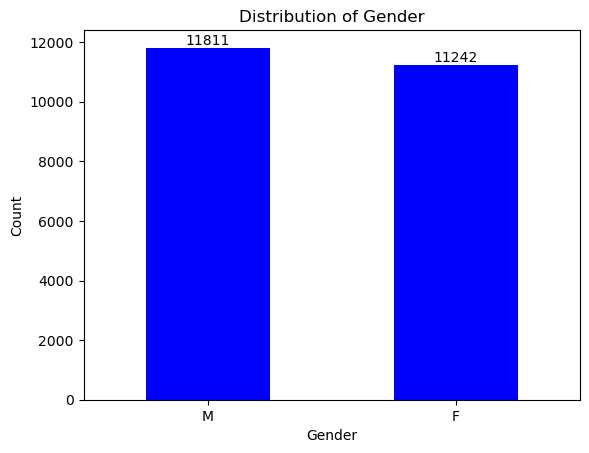

In [21]:
# Plot the bar chart
number_of_male_female=transaction_master_bi['Gender'].value_counts()
a = number_of_male_female.plot(kind='bar', color='b')
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Add count labels above each bar
for i, count in enumerate(number_of_male_female):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()


In [22]:
transaction_master_bi['Qty'].fillna(1,inplace=True)
transaction_master_bi['Qty'] = transaction_master_bi['Qty'].apply(lambda x: 1 if x == 0 else x)
transaction_master_bi['Rate'].fillna(transaction_master_bi['Rate'].mean(),inplace=True)
avg_tax=transaction_master_bi['Tax'].mean()
amount_before_tax=transaction_master_bi['Rate']*transaction_master_bi['Qty']
avg_amount=amount_before_tax.mean()
avg_tax_rate=avg_tax/avg_amount
avg_tax=avg_tax_rate*avg_amount
transaction_master_bi['Tax'].fillna(avg_tax,inplace=True)
total_amount=transaction_master_bi['Rate']*transaction_master_bi['Qty']+transaction_master_bi['Tax']
avg_total_amount=total_amount.mean()
transaction_master_bi['total_amt'].fillna(avg_total_amount,inplace=True)



In [23]:
transaction_master_bi.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,5,1497,785.925,8270.925,e-Shop,1973-05-11,F,8,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,2,791,166.110,1748.110,TeleShop,1992-07-27,M,8,Books,DIY
3,93274880719,271509,2014-02-24,11,6,3,1363,429.345,4518.345,e-Shop,1981-06-08,M,3,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,2,791,166.110,1748.110,TeleShop,1992-07-27,M,8,Books,DIY
5,97439039119,272357,2014-02-23,8,3,2,824,173.040,1821.040,TeleShop,1982-10-09,F,6,Electronics,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,1,1450,152.250,1602.250,e-Shop,1981-05-29,M,9,Home and kitchen,Bath
7,22643667930,271489,2014-02-22,12,6,1,1225,128.625,1353.625,TeleShop,1971-04-21,M,9,Home and kitchen,Tools
8,79792372943,275108,2014-02-22,3,1,3,908,286.020,3010.020,MBR,1971-11-04,F,8,Clothing,Kids
9,50076728598,269014,2014-02-21,8,3,4,581,244.020,2568.020,e-Shop,1979-11-27,F,3,Electronics,Personal Appliances


In [24]:
import datetime as dt

transaction_master_bi['YEAR']=transaction_master_bi['DOB'].dt.year

In [25]:
current_year = dt.datetime.now().year
current_year

2024

In [26]:
transaction_master_bi['Age'] = current_year - transaction_master_bi['DOB'].dt.year

In [27]:
transaction_master_bi['Age'].max()

54

In [28]:
transaction_master_bi['Age'].min()

32

<Figure size 1500x1000 with 0 Axes>

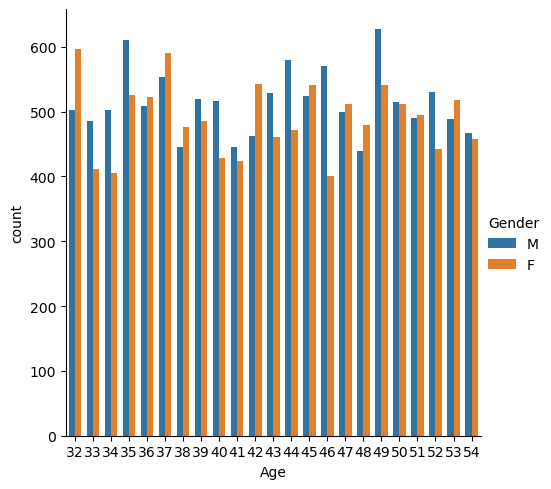

In [29]:
plt.figure(figsize=(15,10))
sns.catplot(x='Age',data=transaction_master_bi,kind='count',hue="Gender",width=0.7)

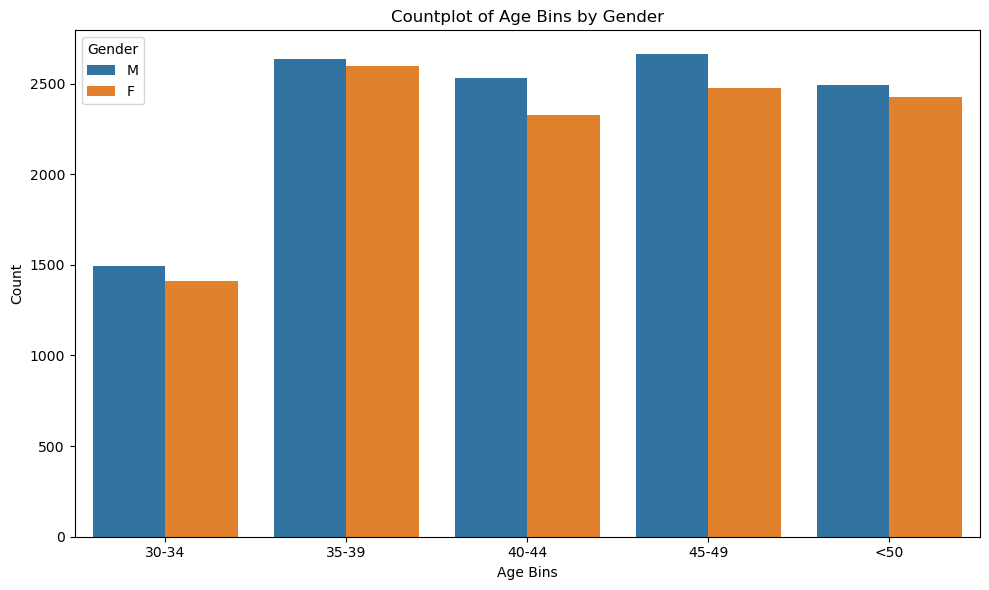

In [30]:
bins = [30, 35, 40, 45, 50,55]  # Example bins
labels = ['30-34', '35-39', '40-44', '45-49','<50']
transaction_master_bi['Age_Bin'] = pd.cut(transaction_master_bi['Age'], bins=bins, labels=labels, right=False)

# Create countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=transaction_master_bi, x='Age_Bin', hue='Gender')
plt.title('Countplot of Age Bins by Gender')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=360)  # Rotate x-axis labels for better visibility
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

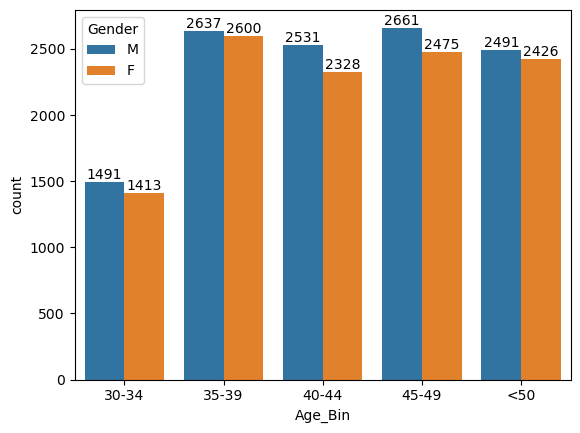

In [31]:
i=sns.countplot(data=transaction_master_bi,x='Age_Bin', hue='Gender')
for bars in i.containers:
    i.bar_label(bars)

In [32]:
unique_products=transaction_master_bi.groupby('prod_cat')['prod_cat'].unique()

In [33]:
print(unique_products)

prod_cat
Bags                            [Bags]
Books                          [Books]
Clothing                    [Clothing]
Electronics              [Electronics]
Footwear                    [Footwear]
Home and kitchen    [Home and kitchen]
Name: prod_cat, dtype: object


/var/folders/4x/bhr05fqs1xq2l403bnmgyvf00000gn/T/ipykernel_55421/1651634765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='prod_cat', data=transaction_master_bi, palette='viridis')


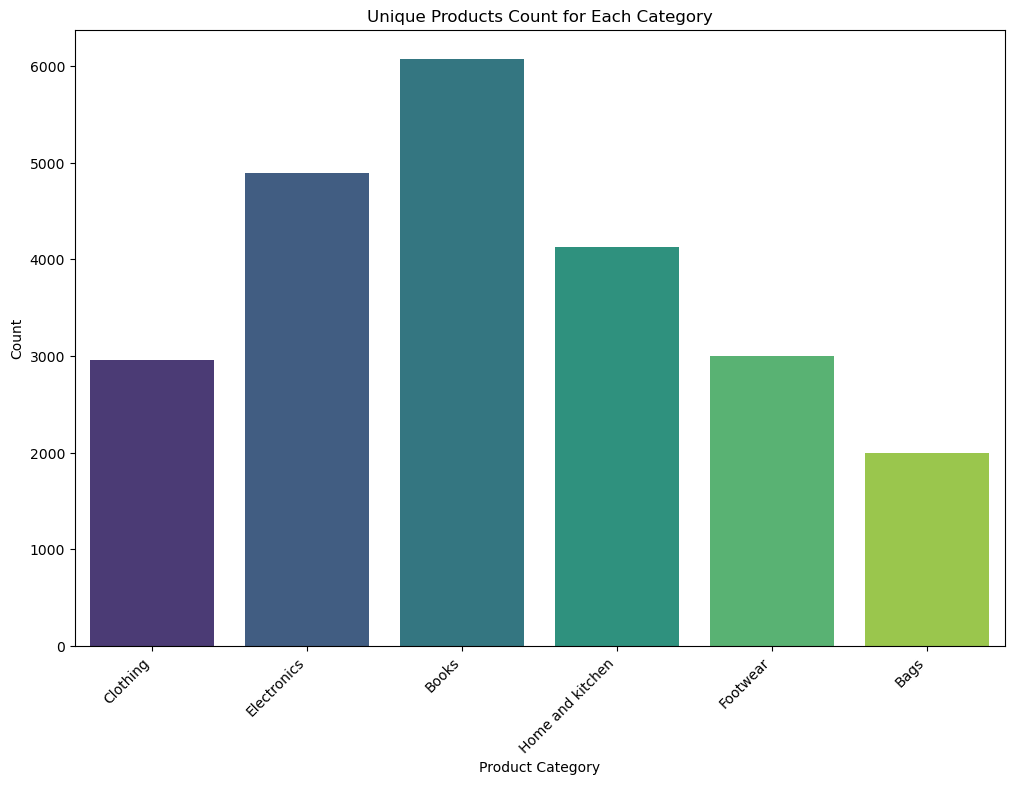

In [34]:

plt.figure(figsize=(12, 8))
sns.countplot(x='prod_cat', data=transaction_master_bi, palette='viridis')
plt.title('Unique Products Count for Each Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

plt.show()


In [35]:
transaction_master_bi['Store_type'].unique()

array(['e-Shop', 'TeleShop', 'MBR', 'Flagship store'], dtype=object)

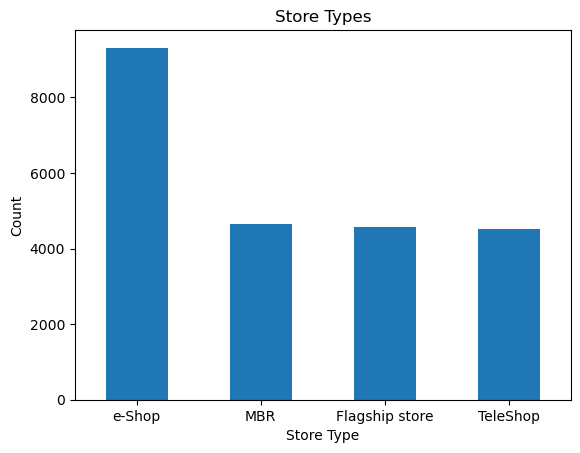

In [36]:
transaction_master_bi['Store_type'].value_counts().plot(kind='bar', rot=0)
plt.title('Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

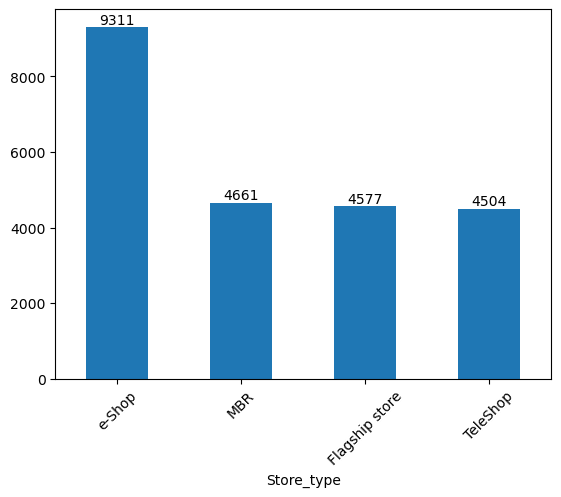

In [37]:
ax=transaction_master_bi['Store_type'].value_counts().plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

In [38]:
grouped_df_prod_cat = transaction_master_bi.groupby('prod_cat')['total_amt'].sum().reset_index()

print(grouped_df_prod_cat)

           prod_cat     total_amt
0              Bags  5.242352e+06
1             Books  1.594691e+07
2          Clothing  7.897857e+06
3       Electronics  1.296449e+07
4          Footwear  7.729465e+06
5  Home and kitchen  1.054693e+07


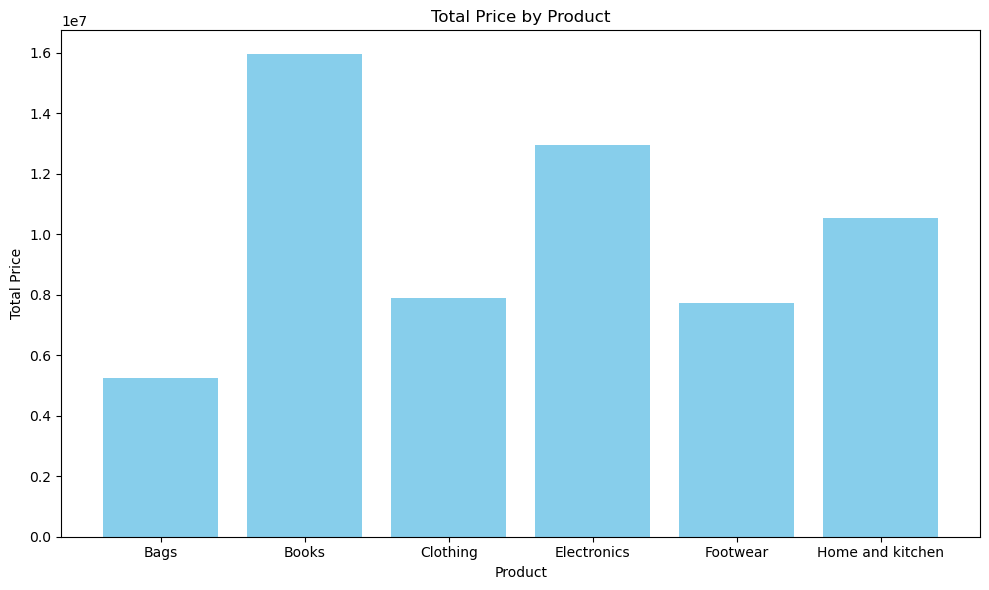

In [39]:
# Plotting
plt.figure(figsize=(10, 6))  # Setting figure size
plt.bar(grouped_df_prod_cat['prod_cat'], grouped_df_prod_cat['total_amt'], color='skyblue')  # Creating bar plot

# Adding titles and labels
plt.title('Total Price by Product')
plt.xlabel('Product')
plt.ylabel('Total Price')

# Displaying plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [40]:
transaction_master_bi["prod_cat"].value_counts()

prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64

<AxesSubplot:xlabel='prod_subcat'>

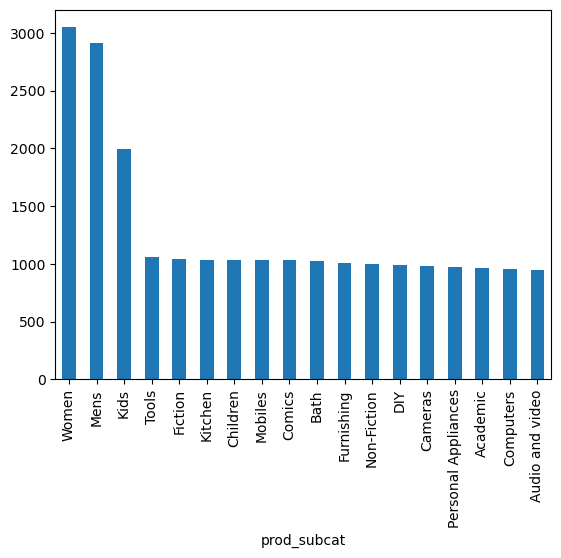

In [41]:
transaction_master_bi['prod_subcat'].value_counts().plot(kind='bar')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Electronics'),
  Text(2, 0, 'Books'),
  Text(3, 0, 'Home and kitchen'),
  Text(4, 0, 'Footwear'),
  Text(5, 0, 'Bags')])

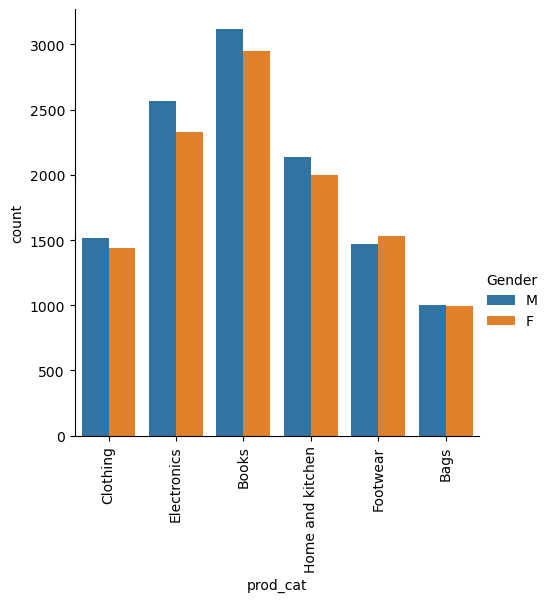

In [42]:
sns.catplot(x='prod_cat',data=transaction_master_bi,kind='count',hue="Gender")
plt.xticks(rotation=90)

<AxesSubplot:>

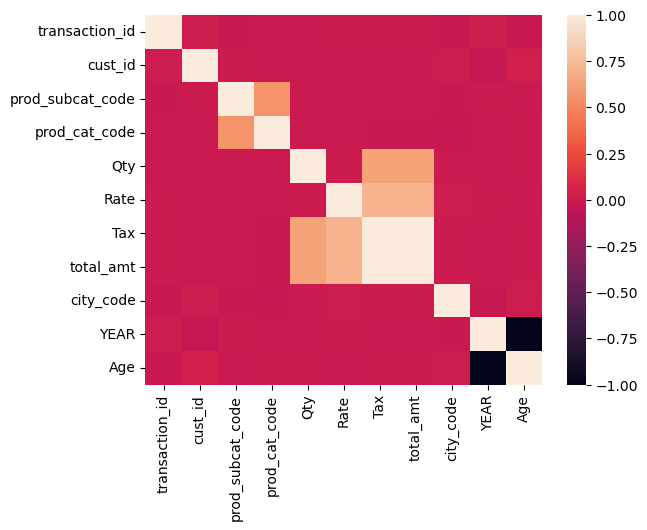

In [45]:
sns.heatmap(transaction_master_bi.corr(numeric_only=True))